## Notebook to run the jaguar data set

In [1097]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import numpy as np
from datetime import date
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink
from copy import deepcopy
import itertools as it
import statsmodels.api as sm
from scipy.stats.distributions import chi2
from random import choices
import scipy as sp
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import haversine_distances

# viz
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# feems
import sys
sys.path.append('../../')
from feems.utils import prepare_graph_inputs
from feems.spatial_graph import query_node_attributes
from feems import SpatialGraph, Viz, Objective
from feems.cross_validation import run_cv, comp_mats, run_cv_joint
from feems.helper_funcs import cov_to_dist, comp_genetic_vs_fitted_distance, plot_default_vs_long_range, get_best_lre
from feems.joint_ver import FEEMSmix_SpatialGraph, FEEMSmix_Objective

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["axes.axisbelow"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1104]:
# os.chdir("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data")
# coord = np.load("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data/used_coordinates.npy")  # sample coordinates
# coord = pd.read_csv("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data/jaguar_plink/GeographicCoordinates.csv") 
# outer = np.load("outer_coordinates.npy")  # outer coordinates
# grid_path = "/Users/vivaswatshastry/src/feems/feems/data/grid_100.shp"  # path to discrete global grid
# bim,fam,G  = read_plink("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data/jaguar_plink/jaguar_nosibnogeo")
# geno = G.compute()
# imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# geno = imp.fit_transform((np.array(geno)).T)
# genotypes = np.load("/Users/vivaswatshastry/Google Drive/Other computers/My Mac mini/Documents/feemsResults/jaguar/data/genotypes.npy")  # genotypes

# sample_names = coord.Sample.values
# sample_names = [name.replace(" ","") for name in sample_names]
# coord.Sample = sample_names
# coord = pd.merge(fam,coord,left_on='iid',right_on="Sample")
# coord.loc[:,['Longitude','Latitude']].values

In [1064]:
## removing 16 atlantic forest inds
# geno = np.delete(geno, [0,9,2,3,4,1,37,51,27,11,7,35,43], axis=0)
# coord = coord.drop(index=[0,9,2,3,4,1,37,51,27,11,7,35,43])

(53, 75436)

In [7]:
# outer, edges, grid, ipmap = prepare_graph_inputs(coord=coord, 
#                                              ggrid=grid_path,
#                                              translated=True, 
#                                              buffer=0,
#                                              outer=outer)

# sp_graph = SpatialGraph(geno, coord.loc[:,['Longitude','Latitude']].values, grid, edges)
# sp_graph_jt = FEEMSmix_SpatialGraph(genotypes, coord, grid, edges)
# central_longitude,central_latitude = np.mean(grid,axis = 0)
# projection = ccrs.EquidistantConic(central_longitude, central_latitude)

Type:        property
String form: <property object at 0x115555ad0>
Docstring:  
Imagine an elastic band stretched around the geometry: that's a
convex hull, more or less

The convex hull of a three member multipoint, for example, is a
triangular polygon.


In [1010]:
# lamb=400.
# sp_graph.fit(lamb=lamb)
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1, 1, 1, projection=projection)  
# v = Viz(ax, sp_graph, projection=projection, edge_width=.5, edge_zorder=100, sample_pt_size=12, 
#         obs_node_size=15, sample_pt_color="black", cbar_font_size=10)
# v.draw_map(); v.draw_samples(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=True); v.draw_edge_colorbar()

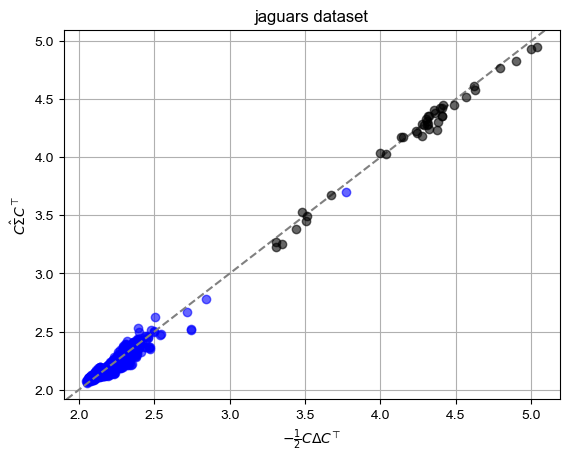

In [1127]:
# tril_idx = np.tril_indices(sp_graph.n_observed_nodes, k=-1)
# obj = Objective(sp_graph); obj.inv(); obj.grad(reg=False); print(obj.neg_log_lik())
# fit_cov, _, emp_cov = comp_mats(obj)
# fit_dist = cov_to_dist(fit_cov)[tril_idx]
# emp_dist = cov_to_dist(emp_cov)[tril_idx]
# X = sm.add_constant(fit_dist)
# mod = sm.OLS(emp_dist, X)
# res = mod.fit()
# muhat, betahat = res.params

# plt.scatter(fit_dist, emp_dist, color="black", s=5)
# x_ = np.linspace(np.min(fit_dist), np.max(fit_dist), 20)
# plt.plot(x_, muhat + betahat * x_, color="orange", linestyle='--', linewidth=2)
# plt.text(4.2, 2, "R²={:.2f}".format(res.rsquared))
# plt.xlabel("fitted distance"); plt.ylabel("empirical distance"); plt.title(r'$\lambda={:.1f}$'.format(lamb)); plt.grid()

# plt.plot(fit_dist,emp_dist/fit_dist-np.mean(emp_dist/fit_dist),'ko'); plt.axhline(-11*np.std(emp_dist/fit_dist),color='red')
# for k in np.where(emp_dist/fit_dist-np.mean(emp_dist/fit_dist)< -10* np.std(emp_dist/fit_dist))[0]:
    # x = np.floor(np.sqrt(2*k+0.25)-0.5).astype('int')+1; y = int(k - 0.5*x*(x-1)); print(x, y)

# C = np.vstack((-np.ones(sp_graph_jt.n_observed_nodes-1),np.eye(sp_graph_jt.n_observed_nodes-1))).T
# tril_idx = np.tril_indices(sp_graph_jt.n_observed_nodes-1,-1)
# Rmat = -2*obj.Linv[:sp_graph_jt.n_observed_nodes,:sp_graph_jt.n_observed_nodes] + np.reshape(np.diag(obj.Linv[:sp_graph_jt.n_observed_nodes,:sp_graph_jt.n_observed_nodes]),(1,-1)).T @ np.ones((sp_graph_jt.n_observed_nodes,1)).T + np.ones((sp_graph_jt.n_observed_nodes,1)) @ np.reshape(np.diag(obj.Linv),(1,-1))
# Q1mat = (np.ones((sp_graph_jt.n_observed_nodes,1)) @ np.reshape(1/sp_graph_jt.q,(1,-1))).T
# resmat = Rmat + (Q1mat + Q1mat.T) - 2*np.diag(1/sp_graph_jt.q)
# plt.plot(-0.5*(C@resmat@C.T)[tril_idx],(C@sp_graph_jt.S@C.T)[tril_idx],'bo',alpha=0.6,); plt.axline((4.,4.),slope=1,color='grey',ls='--'); plt.xlabel(r'$-\frac{1}{2}C\Delta C^\top$'); plt.ylabel(r'$C \hat \Sigma C^\top$'); plt.plot(np.diag(-0.5*C@resmat@C.T),np.diag(C@sp_graph_jt.S@C.T),'ko',alpha=0.6,); plt.title('jaguars dataset'); plt.grid()

In [1062]:
# plt.hist(v.weights,15); plt.hist(sp_graph_jt.w,15,alpha=0.6)
# np.allclose(sp_graph_jt.L.todense(),sp_graph_jt.L.T.todense())
## https://math.stackexchange.com/questions/3604998/is-there-a-way-to-quickly-compute-diagonal-entries-of-inverse-of-a-positive-defi
# pinv = np.linalg.pinv(sp_graph_jt.L.todense())
# np.linalg.norm(sp_graph_jt.factor.solve_L([0]*10+[1]+[0]*771,use_LDLt_decomposition=False))**2, np.diag(pinv)[45]
# factor = cholmod.cholesky(sp_graph_jt.L)
# norm = np.linalg.norm(factor.solve_L(np.diag(np.repeat(1,816)),use_LDLt_decomposition=True),axis=0)**2
# sp_graph_jt.factor.L().shape
# np.diag(pinv)[233:235]
# plt.plot(np.diag(pinv)[34:],np.diag(fulinv),'ko'); plt.axline((0,0),slope=1,color='grey'); plt.grid()
# sp_graph_jt.L_block['do'].toarray().shape
# plt.scatter(np.diag(pinv)[:34], np.diag(obj_jt.Linv))
# plt.scatter(np.diag(np.linalg.pinv(sp_graph_jt.L.todense()))[:34], np.diag(obj_jt.Linv))
# u,s,vT = sp.sparse.linalg.svds(sp_graph_jt.L_block['dd']-sp_graph_jt.L_block['do']@sp.sparse.linalg.inv(sp_graph_jt.L_block['oo'])@sp_graph_jt.L_block['od'],k=681)
# plt.scatter(np.ravel(pinv[34:,34:]),np.ravel(vT.T@np.diag(1/s)@u.T),marker='.'); plt.axline((0,0),slope=1,color='grey'); plt.grid()
# B = sp.sparse.linalg.splu(sp_graph_jt.L_block['dd']-sp_graph_jt.L_block['do']@sp.sparse.linalg.inv(sp_graph_jt.L_block['oo'])@sp_graph_jt.L_block['od'])
# B.solve(np.eye(782))
sp_graph_jt.q

array([0.53452526, 0.52485212, 0.50536445, 0.5216255 , 0.58504996,
       0.54960214, 0.52475414, 1.09574732, 0.52776876, 0.43436559,
       0.53081443, 1.10098477, 0.50442173, 0.53065311, 0.5081972 ,
       0.5274409 , 0.53545766, 0.52219635, 0.53097742, 0.54615701,
       0.55325299, 0.52514356, 0.54236768, 0.53279239, 0.52004846,
       1.15508299, 0.53777271, 0.92115679, 1.08946876, 1.10118225,
       0.54121706, 0.56445793, 0.49397012, 0.55932254, 0.53810355,
       1.6297438 , 1.67094218, 0.5252189 , 0.58140389, 0.54576006,
       0.88972005, 0.48827647])

In [1124]:
# fulinv = np.linalg.pinv(sp_graph_jt.L_block['dd'].todense()-sp_graph_jt.L_block['do'].todense()@np.linalg.inv(sp_graph_jt.L_block['oo'].todense())@sp_graph_jt.L_block['do'].T.todense())
# np.linalg.pinv((sp_graph_jt.L_block['dd']-sp_graph_jt.L_block['do']@sp.sparse.linalg.inv(sp_graph_jt.L_block['oo'])@sp_graph_jt.L_block['od']).todense())
# fulinv = np.linalg.pinv(sp_graph_jt.L_block['dd'].todense())-np.linalg.pinv(sp_graph_jt.L_block['dd'].todense())@np.ones((782,782))@np.linalg.pinv(sp_graph_jt.L_block['dd'].todense())/(816+np.ones((1,782))@np.linalg.pinv(sp_graph_jt.L_block['dd'].todense())@np.ones((782,1))) 
# fac = cholmod.cholesky(sp_graph_jt.L_block['dd']-sp_graph_jt.L_block['do']@sp.sparse.linalg.inv(sp_graph_jt.L_block['oo'])@sp_graph_jt.L_block['od'])
# fac = cholmod.cholesky(sp.sparse.csc_matrix(sp_graph_jt.L_block['dd'].todense()-sp_graph_jt.L_block['do'].todense()@np.linalg.inv(sp_graph_jt.L_block['oo'].todense())@sp_graph_jt.L_block['do'].T.todense()))
# plt.scatter(np.diag(pinv)[34:],np.linalg.norm(fac.solve_L(np.diag(np.repeat(1,782)),use_LDLt_decomposition=False),axis=0)**2); plt.axline((0.2,0.2),slope=1); plt.grid()
# np.allclose(pinv[:34,:34],obj_jt.Linv[:34,:34])
# plt.scatter(np.diag(pinv[34:,34:]),np.diag(fulinv)); plt.axline((0,0),slope=1,color='grey'); plt.grid()
# np.linalg.pinv(sp_graph_jt.L.todense())

/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


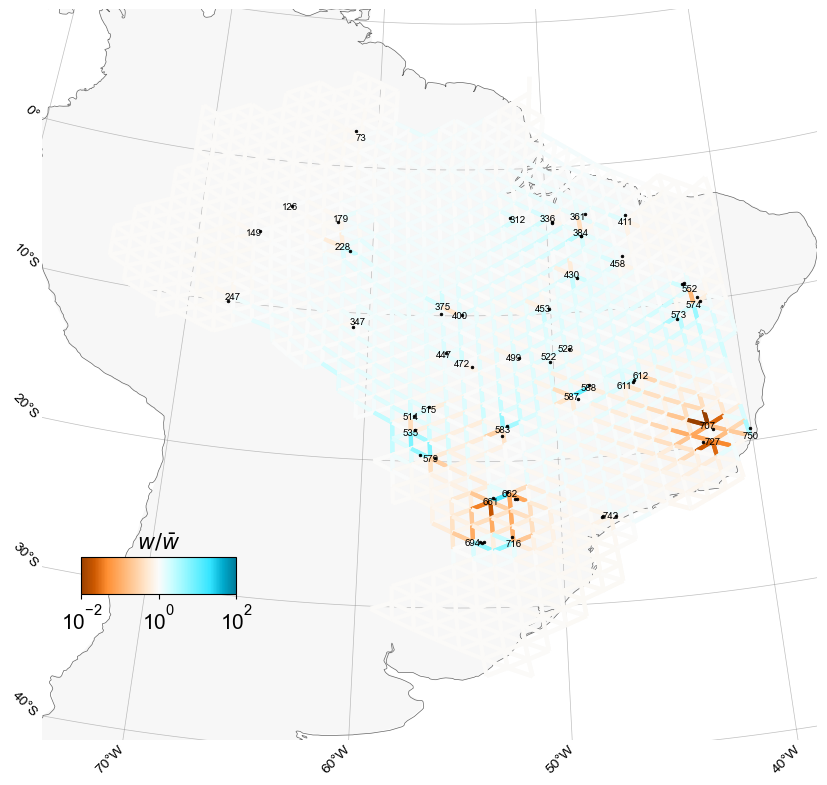

In [1120]:
# lamb = 430.
# sp_graph_jt.fit(lamb=lamb,optimize_q='n-dim')
# fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(1, 1, 1, projection=projection)  
# v = Viz(ax, sp_graph_jt, projection=projection, edge_width=3, edge_zorder=100, sample_pt_size=15, 
#         obs_node_size=25, sample_pt_color="black", cbar_font_size=15, abs_max=2, cbar_nticks=2, cbar_ticklabelsize=15)
# v.draw_map(); v.draw_samples(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=True); v.draw_edge_colorbar()
# v.ax.set_title(r'$\lambda={}$'.format(lamb))
# obs_grid = v.grid[obs_perm_ids,:]
# for i in range(len(pair)):
#     v.ax.plot(
#         [obs_grid[pair[i][0], 0],obs_grid[pair[i][1],0]],
#         [obs_grid[pair[i][0], 1],obs_grid[pair[i][1],1]],
#         color = 'olive', linewidth = 0.5
#     )
#     v.ax.text(
#         np.mean([obs_grid[pair[i][0], 0],obs_grid[pair[i][1], 0]]),
#         np.mean([obs_grid[pair[i][0], 1],obs_grid[pair[i][1], 1]]),
#         str("{:.3f}".format(pval[i])),
#         horizontalalignment="left",
#         verticalalignment="center",
#         size=v.obs_node_textsize*1.1
#     )
# for ie, e in enumerate([(24, 28),(33, 30),(30,31)]):
#         v.draw_arrow([e],1.,lw=2.2,hw=.5e5,hl=1e5,mode='sampled')

In [1129]:
# np.savetxt('../results/nodepos.csv',sp_graph_jt.node_pos,delimiter=',')
# np.savetxt('../results/nodepos.csv',np.vstack((sp_graph_jt.node_pos.T,[sp_graph_jt.nodes[n]['n_samples'] for n in range(len(sp_graph_jt.nodes))])).T,delimiter=',')
# plt.hist(sp_graph_jt.w,25,alpha=0.6,label='raw weights'); plt.legend(); plt.axvline(np.mean(sp_graph_jt.w)); plt.show()
# plt.hist(v.edge_norm(v.norm_log_weights),25,label='LogNorm of normalized weights'); plt.hist(v.norm_log_weights,15,alpha=0.5,label='normalized weights'); plt.hist(clr.Normalize()(v.norm_log_weights),15,alpha=0.5,label='LinearNorm of normalized weights'); plt.legend()
# plt.axvline(np.mean(v.edge_norm(v.norm_log_weights))); plt.axvline(np.mean(v.norm_log_weights),color='orange'); plt.axvline(np.mean(clr.Normalize()(v.norm_log_weights)),color='green'); plt.legend(); plt.show()
# plt.hist(clr.Normalize(vmin=-2,vmax=2)(v.norm_log_weights),15,alpha=0.5);
# np.savetxt('../')
# np.savetxt('../results/edgew_lamb430.csv',np.vstack((np.array(sp_graph_jt.edges).T,sp_graph_jt.w)).T,delimiter=',')

EdgeView([(0, 2), (0, 1), (1, 10), (1, 9), (1, 2), (2, 10), (2, 11), (2, 3), (3, 11), (3, 12), (3, 4), (4, 12), (4, 13), (5, 14), (5, 6), (5, 15), (6, 15), (6, 16), (6, 7), (7, 17), (7, 16), (8, 18), (8, 19), (9, 20), (9, 10), (9, 21), (10, 22), (10, 21), (10, 11), (11, 23), (11, 12), (11, 22), (12, 23), (12, 13), (12, 24), (13, 25), (13, 14), (13, 24), (14, 25), (14, 15), (14, 26), (15, 26), (15, 16), (15, 27), (16, 27), (16, 28), (16, 17), (17, 29), (17, 28), (17, 18), (18, 29), (18, 30), (18, 19), (19, 31), (19, 30), (20, 21), (20, 34), (20, 33), (21, 22), (21, 34), (21, 35), (22, 23), (22, 36), (22, 35), (23, 24), (23, 36), (23, 37), (24, 25), (24, 37), (24, 38), (25, 38), (25, 26), (25, 39), (26, 40), (26, 27), (26, 39), (27, 28), (27, 41), (27, 40), (28, 29), (28, 41), (28, 42), (29, 30), (29, 43), (29, 42), (30, 31), (30, 43), (30, 44), (31, 44), (31, 45), (32, 33), (32, 46), (32, 47), (33, 47), (33, 34), (33, 48), (34, 49), (34, 35), (34, 48), (35, 50), (35, 49), (35, 36), (36,

In [369]:
np.savetxt('../results/edgecolor_lamb430.csv',v.edge_cmap(v.edge_norm(v.norm_log_weights)),delimiter=',')

In [138]:
# 55 inds x 91k SNPs across 42 observed demes
# distribution of # inds in each deme -> sp_graph_jt.n_samples_per_obs_node_permuted
sample_idx = nx.get_node_attributes(sp_graph_jt, "sample_idx")
permuted_idx = query_node_attributes(sp_graph_jt, "permuted_idx")
observed_permuted_idx = permuted_idx[: sp_graph_jt.n_observed_nodes]

freqs = np.zeros_like(sp_graph_jt.frequencies)
for i, node_id in enumerate(observed_permuted_idx):
    s = sample_idx[node_id]

    # compute mean at each node
    freqs[i,:] = np.mean(sp_graph_jt.genotypes[s,:], axis=0)/2
    # freqs[i,:] = np.sum(sp_graph_jt.genotypes[s,:], axis=0)

het = 2*freqs*(1-freqs)

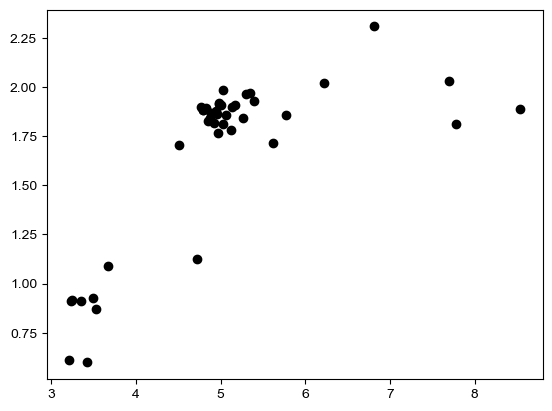

In [159]:
# allel.mean_pairwise_difference(np.vstack((freqs[:,0], (2*sp_graph_jt.n_samples_per_obs_node_permuted)-freqs[:,0])))
# plt.scatter(np.arange(1,sp_graph_jt.n_observed_nodes+1),het.mean(axis=1),color='k',marker='d',s=30*sp_graph_jt.n_samples_per_obs_node_permuted); plt.axhline(het.mean(),color='red',linestyle='--'); plt.xlabel('deme ID'); plt.ylabel('average heterozygosity'); plt.grid()
# alls = np.zeros((sp_graph_jt.genotypes.shape[1],2))
# for snp in range(sp_graph_jt.genotypes.shape[1]):
#     alls[snp,:] = allel.mean_pairwise_difference(np.vstack((freqs[:,snp], (2*sp_graph_jt.n_samples_per_obs_node_permuted)-freqs[:,snp])))
# [allel.mean_pairwise_difference(np.vstack((freqs[id,:], 2-freqs[id,:])))[0] for id in range(42)]

In [386]:
# mapdf = pd.DataFrame(columns=['chrom','id'])
# mapdf['chrom'] = ['chr1']*91038
# mapdf['id'] = range(1,91039)
# mapdf.to_csv('jag.map',sep=' ',index=False,header=False)
# os.getcwd()
# pd.DataFrame(genotypes).to_csv('jag.geno',sep=' ',index=False,header=False)
# plt.plot(v.grid[permuted_idx[: v.sp_graph.n_observed_nodes],:][:,1],het.mean(axis=1),'ko',markersize=10)
# plt.plot([sp_graph_jt.nodes[i]['pos'][0] for i in permuted_idx[:42]], het.mean(axis=1), 'o', color='goldenrod', markersize=8); plt.xlabel('longitude'); plt.ylabel('average heterozygosity'); plt.grid()
# sp.stats.linregress([sp_graph_jt.nodes[i]['pos'][0] for i in permuted_idx[:42]], het.mean(axis=1))
# plt.plot([sp_graph_jt.nodes[i]['pos'][1] for i in permuted_idx[:42]], het.mean(axis=1), 'o', color='goldenrod', markersize=8); plt.xlabel('latitude'); plt.ylabel('average heterozygosity'); plt.grid()
[sp_graph_jt.nodes[i]['sample_idx'] for i in [661,662,694,716,742,707,727,750]]

[[10], [3, 4, 5], [1, 2, 38], [53], [0, 36, 44], [12], [28], [8]]

In [571]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1, 1, 1, projection=projection)  
# v = Viz(ax, sp_graph_jt, projection=projection, edge_width=.5, edge_zorder=100, sample_pt_size=12, 
#         obs_node_size=15, sample_pt_color="black", cbar_font_size=10)
# v.draw_map(); v.draw_edges(use_weights=True); v.draw_obs_nodes(use_ids=True); v.draw_edge_colorbar()
# v.ax.scatter(v.grid[permuted_idx[: v.sp_graph.n_observed_nodes],:][:,0],v.grid[permuted_idx[: v.sp_graph.n_observed_nodes],:][:,1],edgecolors="black",linewidth=v.obs_node_linewidth,s=het.mean(axis=1)*300,alpha=0.4,color='goldenrod',)

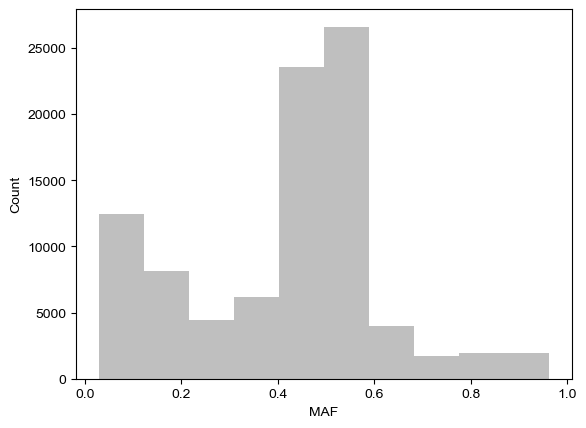

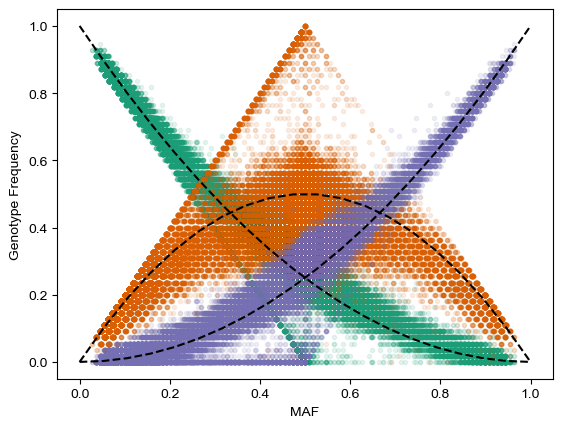

In [410]:
Y = 2 - np.array(genotypes)
n, p = Y.shape

plt.hist(f, color="gray", alpha=.5); plt.xlabel("MAF"); plt.ylabel("Count"); plt.show()

f = np.sum(Y, axis=0) / (2.0*n)
f_aa = np.sum(Y==0, axis=0) / n
f_Aa = np.sum(Y==1, axis=0) / n
f_AA = np.sum(Y==2, axis=0) / n

x = np.linspace(0, 1, 20)
plt.scatter(f, f_aa, alpha=.1, marker=".", color="#1b9e77", zorder=0)
plt.plot(x, (1-x)**2, "--", color="black", zorder=1) 
plt.scatter(f, f_Aa, alpha=.1, marker=".", color="#d95f02", zorder=0)
plt.plot(x, 2*x*(1-x), "--", color="black", zorder=1) 
plt.scatter(f, f_AA, alpha=.1, marker=".", color="#7570b3", zorder=0)
plt.plot(x, x**2, "--", color="black", zorder=1) 
plt.xlabel("MAF"); plt.ylabel("Genotype Frequency"); plt.show()

In [317]:
# D_geno[np.tril_indices(geno.shape[0],k=-1)]
# D_geno[:4,:4], D_geno[np.tril_indices(geno.shape[0],k=-1)][:10]
# ind2ind = pd.DataFrame(np.vstack((fam['iid'].values[np.tril_indices(geno.shape[0],k=-1)[0]],fam['iid'].values[np.tril_indices(geno.shape[0],k=-1)[1]],D_geno[np.tril_indices(geno.shape[0],k=-1)])).T,columns=['ind1','ind2','gendist'])
# ind2ind.to_csv('../results/ind2indgendist.csv',index=False)
# np.savetxt('../results/ind2indgendist.csv',np.vstack((fam['iid'].values[np.tril_indices(56,k=-1)[0]],fam['iid'].values[np.tril_indices(56,k=-1)[1]],D_geno[np.tril_indices(geno.shape[0],k=-1)])).T,delimiter=',')

In [1100]:
# D_geno = squareform(pdist(geno, metric="sqeuclidean")) / geno.shape[1]
# coord_rad = coord[:,::-1] * np.pi / 180.0
# D_geo = haversine_distances(coord_rad) * 6371
# tril_idx = np.tril_indices(genotypes.shape[0], k=-1)
# x = D_geo[tril_idx]
# y = D_geno[tril_idx]
# X = sm.add_constant(x)
# mod = sm.OLS(y, X)
# res = mod.fit()
# muhat, betahat = res.params

obj.extract_outliers(pthresh=0.001)

# plt.scatter(x, y, marker="o", alpha=1, color="black",s=10)

## highlighting points that are from southeast pops
# plt.scatter(x, y, marker="o", color="grey",alpha=0.5,s=10)
# plt.scatter(D_geo[[1,2,38,12,53,28,0,36,44,8],:][D_geo[[1,2,38,12,53,28,0,36,44,8],:]>0],D_geno[[1,2,38,12,53,28,0,36,44,8],:][D_geno[[1,2,38,12,53,28,0,36,44,8],:]>0], marker="x", color="k",s=15)

# plt.hist(D_geno[[1,2,38,12,53,28,0,36,44,8],:][D_geno[[1,2,38,12,53,28,0,36,44,8],:]>0] - (muhat + betahat * D_geo[[1,2,38,12,53,28,0,36,44,8],:][D_geo[[1,2,38,12,53,28,0,36,44,8],:]>0]),15,color='k',alpha=0.8); plt.xlabel('absolute residuals'); plt.axvline(0,color='red'); plt.hist(res.resid,12,color='grey',alpha=0.6)
# np.std(D_geno[[1,2,38,12,53,28,0,36,44,8],:][D_geno[[1,2,38,12,53,28,0,36,44,8],:]>0] - (muhat + betahat * D_geo[[1,2,38,12,53,28,0,36,44,8],:][D_geo[[1,2,38,12,53,28,0,36,44,8],:]>0]))

# x_ = np.linspace(np.min(x), np.max(x), 20)
# plt.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=3)
# plt.text(2000, .6, "R²={:.2f}".format(res.rsquared), fontsize=14); 
# plt.xlabel("great circle distance (km)"); plt.ylabel("genetic distance"); plt.grid()

Using a significance threhsold of 0.001:

7 outlier deme pairs found
 source  dest.        source (lat., long.)         dest. (lat., long.)         pval
    727    707 (2.573, -63.97199999999998) (1.546, -65.95999999999998) 2.169730e-43
    399    742  (3.08, -62.96100000000001) (2.571, -67.90300000000002) 7.774472e-08
    399    662 (0.515, -67.92700000000002) (2.571, -67.90300000000002) 2.619582e-05
    399    750 (3.574, -61.92700000000002) (2.571, -67.90300000000002) 2.627583e-05
    399    694             (1.03, -66.945) (2.571, -67.90300000000002) 9.889847e-05
    694    716  (2.06, -64.97000000000003)             (1.03, -66.945) 7.703906e-04

Putative destination demes (and # of times the deme appears as an outlier) experiencing admixture:
750    2
662    1
694    1
716    1
707    1
Name: dest., dtype: int64


,source,dest.,"source (lat., long.)","dest. (lat., long.)",pval,raw diff.,"# of samples (source, dest.)",Fst
0,399,662,"(0.515, -67.92700000000002)","(2.571, -67.90300000000002)",2.619582e-05,-0.287693,"(3, 1)",0.384099
1,399,694,"(1.03, -66.945)","(2.571, -67.90300000000002)",9.889847e-05,-0.334462,"(2, 1)",0.394768
2,694,716,"(2.06, -64.97000000000003)","(1.03, -66.945)",7.703906e-04,-0.446779,"(1, 2)",0.382480
3,727,707,"(2.573, -63.97199999999998)","(1.546, -65.95999999999998)",2.169730e-43,-1.938463,"(1, 1)",0.263853
4,399,742,"(3.08, -62.96100000000001)","(2.571, -67.90300000000002)",7.774472e-08,-0.570432,"(3, 1)",0.368580
5,399,750,"(3.574, -61.92700000000002)","(2.571, -67.90300000000002)",2.627583e-05,-0.654739,"(1, 1)",0.383981
6,694,750,"(3.574, -61.92700000000002)","(1.03, -66.945)",8.209509e-04,-0.655030,"(1, 2)",0.429164


constant-w/variance fit, converged in 140 iterations, train_loss=6130208.216
constant-w/variance fit, converged in 140 iterations, train_loss=6130208.216
lambda=500.000, alpha=0.7540, converged in 94 iterations, train_loss=6106504.153
constant-w/variance fit, converged in 140 iterations, train_loss=6130208.216
lambda=0.500, alpha=0.7540, converged in 21 iterations, train_loss=6075891.343


Text(0, 0.5, 'genetic distance')

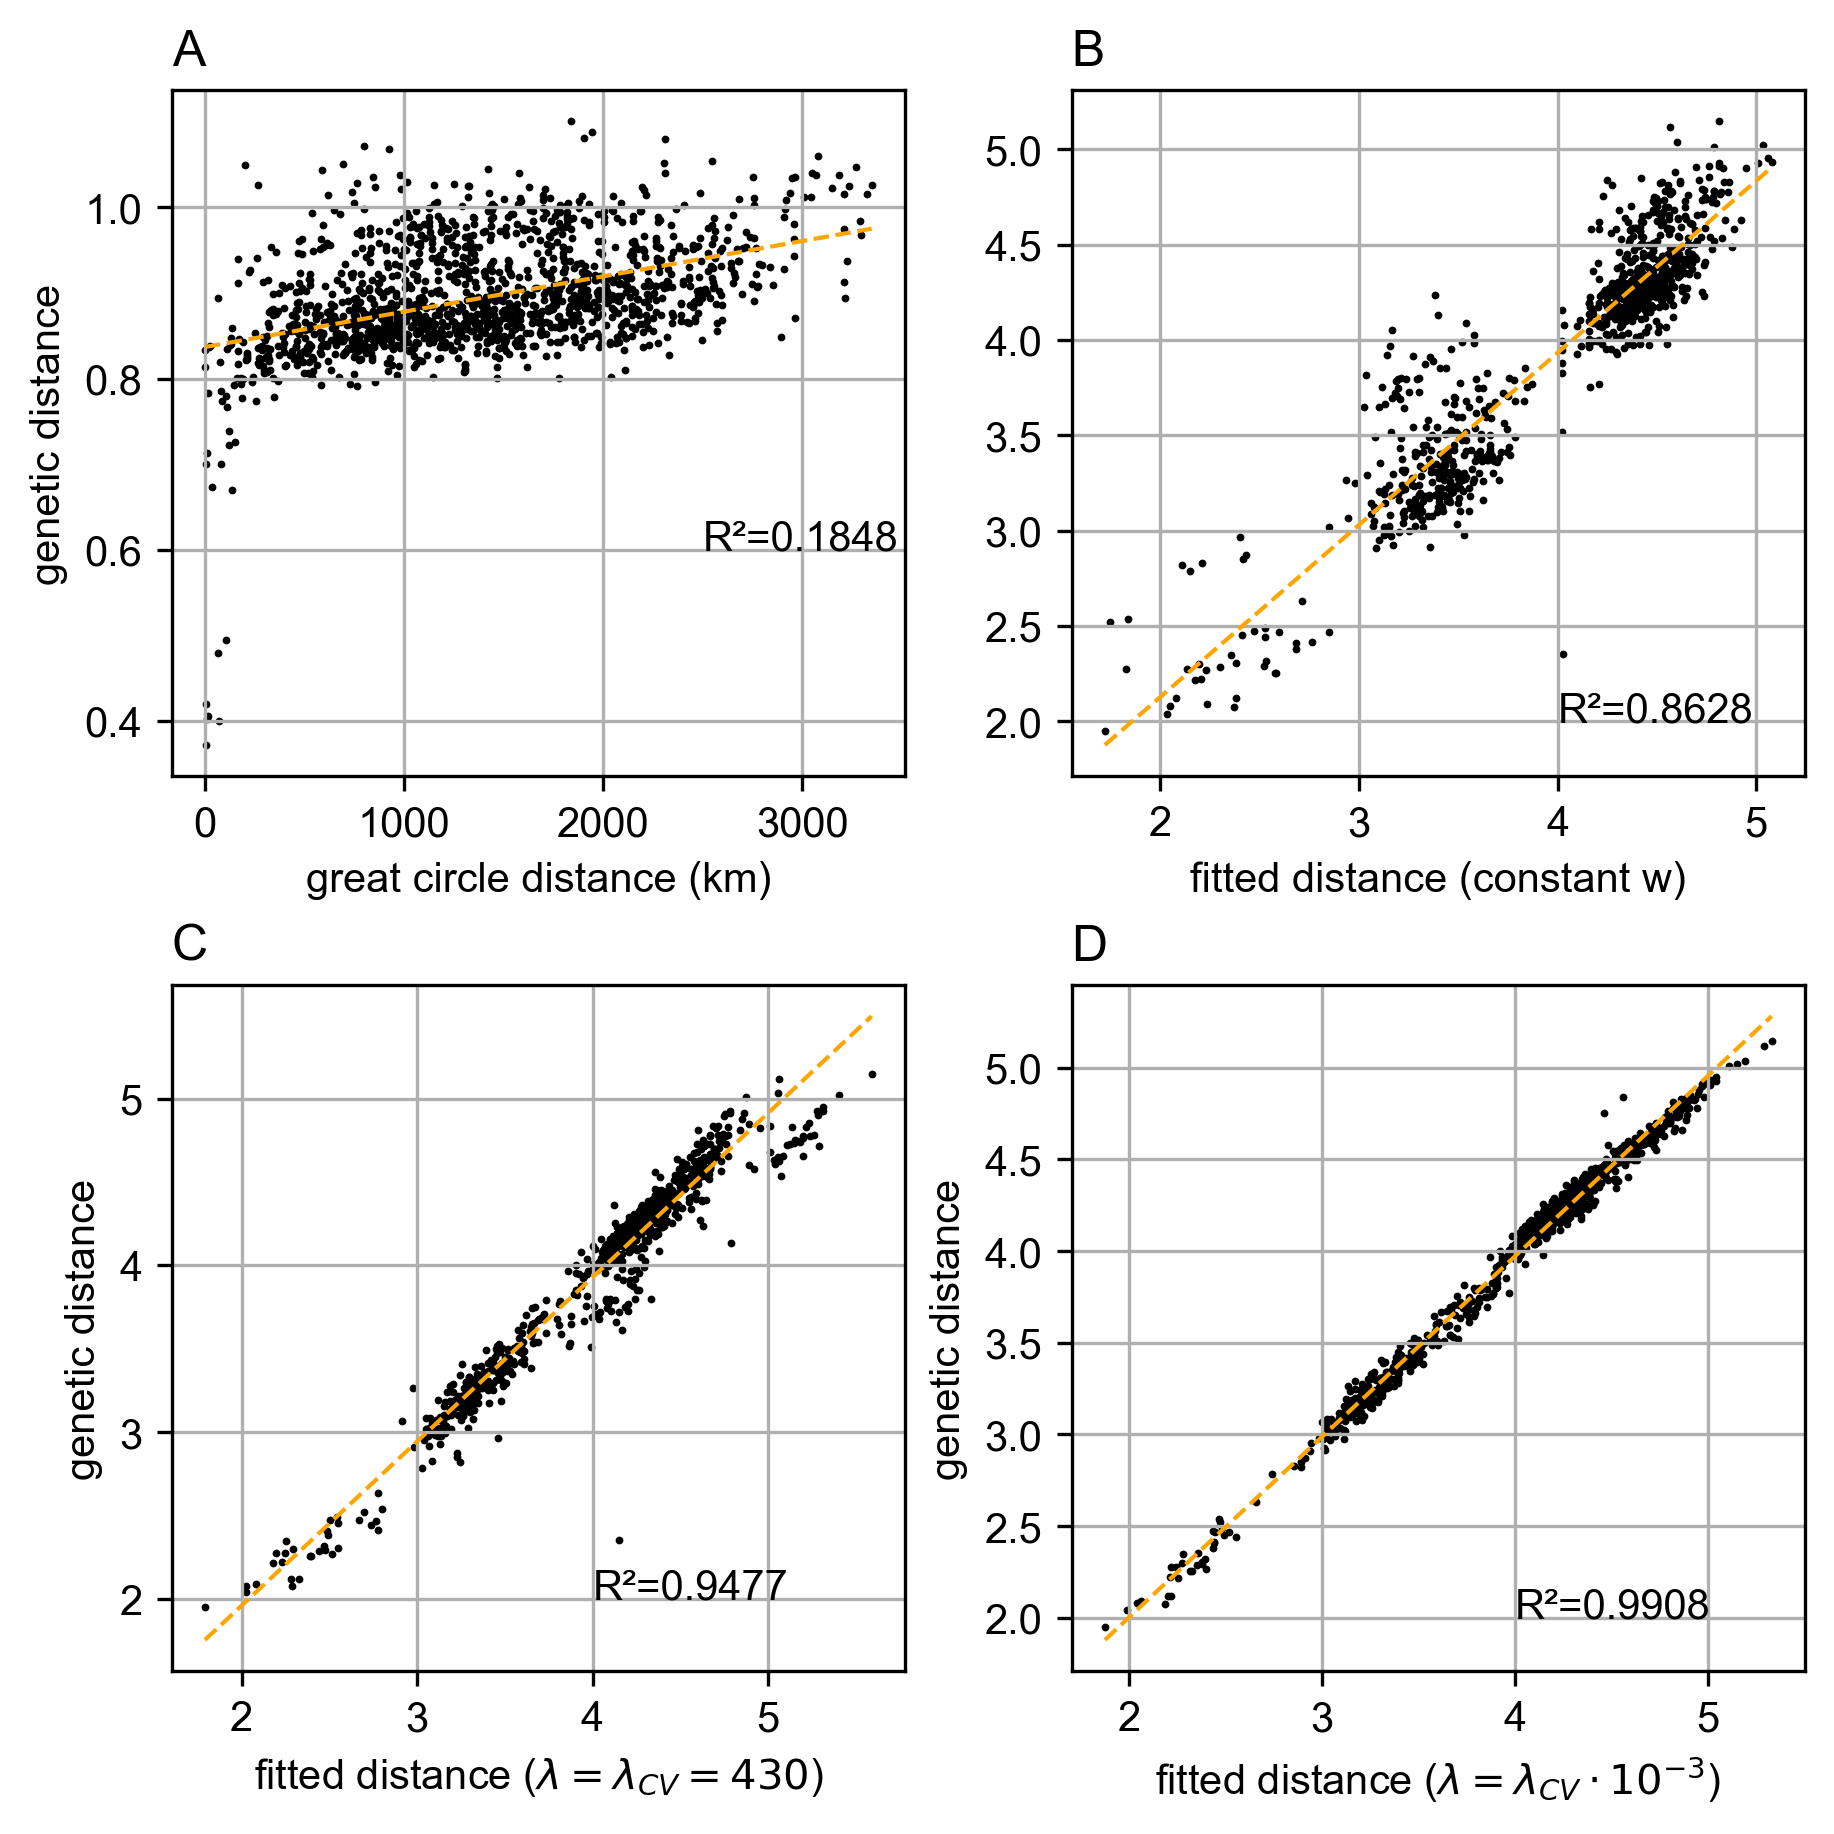

In [1113]:
# from matplotlib import gridspec
lamb_cv = 500.
fig = plt.figure(constrained_layout=True, dpi=300, figsize=(6, 6))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

# (A) Genetic distance vs geographic distance
D_geno = squareform(pdist(sp_graph_jt.genotypes, metric="sqeuclidean")) / sp_graph_jt.n_snps
# coord_rad = coord.loc[:,['Longitude','Latitude']].values[:,::-1] * np.math.pi / 180.0
coord_rad = coord[:,::-1] * np.math.pi / 180.0
D_geo = haversine_distances(coord_rad) * 6371000/1000
tril_idx = np.tril_indices(sp_graph_jt.genotypes.shape[0], k=-1)
x = D_geo[tril_idx]
y = D_geno[tril_idx]
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()
muhat, betahat = res.params

ax_00 = fig.add_subplot(spec[0, 0])
ax_00.set_title("A", loc='left')
ax_00.scatter(x, 
              y, 
              marker=".", 
              alpha=1, 
              zorder=0, 
              color="black",
              s=3)

x_ = np.linspace(np.min(x), np.max(x), 20)
ax_00.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=1); ax_00.grid()
ax_00.text(2500, .6, "R²={:.4f}".format(res.rsquared))
ax_00.set_xlabel("great circle distance (km)")
ax_00.set_ylabel("genetic distance")

# (B) Genetic distance vs fitted distance for constant w model 
tril_idx = np.tril_indices(sp_graph.n_observed_nodes, k=-1)
ax_01 = fig.add_subplot(spec[0, 1])
ax_01.set_title("B", loc='left')
sp_graph_jt.fit_null_model()
sp_graph_jt.comp_graph_laplacian(sp_graph_jt.w)

obj = FEEMSmix_Objective(sp_graph_jt)
fit_cov, _, emp_cov = comp_mats(obj)
fit_dist = cov_to_dist(fit_cov)[tril_idx]
emp_dist = cov_to_dist(emp_cov)[tril_idx]
X = sm.add_constant(fit_dist)
mod = sm.OLS(emp_dist, X)
res = mod.fit()
muhat, betahat = res.params
ax_01.scatter(fit_dist, 
              emp_dist, 
              marker=".", 
              alpha=1, 
              zorder=0, 
              color="black",
              s=3)

x_ = np.linspace(np.min(fit_dist), np.max(fit_dist), 20)
ax_01.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=1); ax_01.grid()
ax_01.text(4, 2, "R²={:.4f}".format(res.rsquared))
ax_01.set_xlabel("fitted distance (constant w)")

# (C) Genetic distance vs fitted distance for lambda = lambda_cv
tril_idx = np.tril_indices(sp_graph_jt.n_observed_nodes, k=-1)
ax_10 = fig.add_subplot(spec[1, 0])
ax_10.set_title("C", loc='left')
lamb = lamb_cv
sp_graph_jt.fit(lamb=lamb,
             lb=np.math.log(1e-6), 
             ub=np.math.log(1e+6))
sp_graph_jt.comp_graph_laplacian(sp_graph.w)

obj = FEEMSmix_Objective(sp_graph_jt)
fit_cov, _, emp_cov = comp_mats(obj)
fit_dist = cov_to_dist(fit_cov)[tril_idx]
emp_dist = cov_to_dist(emp_cov)[tril_idx]
X = sm.add_constant(fit_dist)
mod = sm.OLS(emp_dist, X)
res = mod.fit()
muhat, betahat = res.params
ax_10.scatter(fit_dist,
              emp_dist,
              marker=".", 
              alpha=1, 
              zorder=0, 
              color="black",
              s=3)

x_ = np.linspace(np.min(fit_dist), np.max(fit_dist), 20)
ax_10.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=1); ax_10.grid()
ax_10.text(4., 2, "R²={:.4f}".format(res.rsquared))
ax_10.set_xlabel("fitted distance ($\lambda = \lambda_{CV} = 430$)")
ax_10.set_ylabel("genetic distance")

# (D) Genetic distance vs fitted distance for lambda = 1e-3*lambda_cv
ax_11 = fig.add_subplot(spec[1, 1])
ax_11.set_title("D", loc='left')
lamb = 0.001*lamb_cv
sp_graph_jt.fit(lamb=lamb,
             lb=np.math.log(1e-6), 
             ub=np.math.log(1e+6))
sp_graph_jt.comp_graph_laplacian(sp_graph_jt.w)

obj = FEEMSmix_Objective(sp_graph_jt)
fit_cov, _, emp_cov = comp_mats(obj)
fit_dist = cov_to_dist(fit_cov)[tril_idx]
emp_dist = cov_to_dist(emp_cov)[tril_idx]
X = sm.add_constant(fit_dist)
mod = sm.OLS(emp_dist, X)
res = mod.fit()
muhat, betahat = res.params
ax_11.scatter(fit_dist,
              emp_dist,
              marker=".", 
              alpha=1, 
              zorder=0, 
              color="black",
              s=3)

x_ = np.linspace(np.min(fit_dist), np.max(fit_dist), 20)
ax_11.plot(x_, muhat + betahat * x_, zorder=2, color="orange", linestyle='--', linewidth=1); ax_11.grid()
ax_11.text(4., 2, "R²={:.4f}".format(res.rsquared))
ax_11.set_xlabel("fitted distance ($\lambda = \lambda_{CV}\cdot 10^{-3}$)")
ax_11.set_ylabel("genetic distance")

6075883.724613924


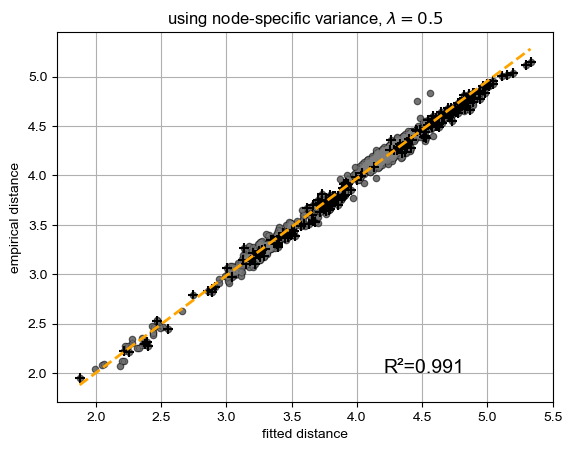

In [1114]:
tril_idx = np.tril_indices(sp_graph_jt.n_observed_nodes, k=-1)
obj_jt = FEEMSmix_Objective(sp_graph_jt); obj_jt.inv(); obj_jt.grad(reg=False); print(obj_jt.neg_log_lik())
fit_cov, _, emp_cov = comp_mats(obj_jt)
fit_dist_jt = cov_to_dist(fit_cov)[tril_idx]
emp_dist_jt = cov_to_dist(emp_cov)[tril_idx]
X = sm.add_constant(fit_dist_jt)
mod = sm.OLS(emp_dist_jt, X)
res = mod.fit()
muhat, betahat = res.params

plt.scatter(fit_dist_jt, emp_dist_jt, color="k", alpha=0.6, s=20)

plt.scatter(fit_dist_jt, emp_dist_jt, marker="o", color="grey",alpha=0.5,s=10)
plt.scatter(cov_to_dist(fit_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0],cov_to_dist(emp_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0],marker="+", color="k",s=50)

# plt.hist(cov_to_dist(emp_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0] - (muhat + betahat * cov_to_dist(fit_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0]),12,color='k',alpha=0.8); plt.xlabel('absolute residuals'); plt.axvline(0,color='red',); plt.hist(res.resid,12,color='grey',alpha=0.6)
# np.std(cov_to_dist(emp_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0] - (muhat + betahat * cov_to_dist(fit_cov)[-6:,:36][cov_to_dist(fit_cov)[-6:,:36]>0]))

x_ = np.linspace(np.min(fit_dist_jt), np.max(fit_dist_jt), 20)
plt.plot(x_, muhat + betahat * x_, color="orange", linestyle='--', linewidth=2)
plt.text(4.2, 2, "R²={:.3f}".format(res.rsquared), fontsize=14)
plt.xlabel("fitted distance"); plt.ylabel("empirical distance"); plt.title(r'using node-specific variance, $\lambda={}$'.format(lamb)); plt.grid()

In [579]:
# plt.plot(np.log(fit_dist_jt),np.log(emp_dist_jt/fit_dist_jt)-np.mean(np.log(emp_dist_jt/fit_dist_jt)),'ko',alpha=0.6); plt.axhline(-3.2*np.std(np.log(emp_dist_jt/fit_dist_jt)),color='red',ls='--'); plt.axhline(0,color='grey',linewidth=3); plt.xlabel('log(Expected)'); plt.ylabel('log(Observed/Expected)'); plt.grid()
# sp.stats.norm.cdf(np.min(np.log(emp_dist_jt/fit_dist_jt)),np.mean(np.log(emp_dist_jt/fit_dist_jt)),np.std(np.log(emp_dist_jt/fit_dist_jt)))
# sp_graph_jt.genotypes.shape
# plt.hist(-emp_dist_jt/fit_dist_jt+np.mean(emp_dist_jt/fit_dist_jt),bins=20,color='grey',alpha=0.6); 
# sm.qqplot(np.log(emp_dist_jt/fit_dist_jt)-np.mean(np.log(emp_dist_jt/fit_dist_jt)),line='r')
# pair = []; pval = []
for k in np.where(np.log(emp_dist_jt/fit_dist_jt)-np.mean(np.log(emp_dist_jt/fit_dist_jt)) < -3.2 * np.std(np.log(emp_dist_jt/fit_dist_jt)))[0]:
    x = np.floor(np.sqrt(2*k+0.25)-0.5).astype('int')+1; y = int(k - 0.5*x*(x-1))
    print(k, x, y)
    # print(k, (emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k], sp.stats.norm.cdf((emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k],loc=1.67e-17,scale=np.std(emp_dist_jt/fit_dist_jt)), x, y)
    # pval.append(sp.stats.norm.cdf((emp_dist_jt/fit_dist_jt-np.mean(emp_dist_jt/fit_dist_jt))[k],loc=1.67e-17,scale=np.std(emp_dist_jt/fit_dist_jt)))
    # pair.append((x,y))

314 25 14
495 31 30
558 33 30


In [561]:
# list(map(tuple,node_to_pop['nodes'][np.ravel(pair)].values.reshape(16,2)))
# [(24, 28),(29, 25),(30, 33),(7, 35),(11, 35),(25, 35),(27, 35),(25, 36),(27, 36),(38, 36),(40, 25),(40,27),(41,27)]
# pair
## 2307 edge weights, 42 observed nodes
# 2*6130208.216 + 2*2, 2*obj.neg_log_lik() + 2*(2307+1), 2*obj_jt.neg_log_lik() + 2*(2307+42)
# print(obj.neg_log_lik(), 6130208.2162306)
# obj_jt.neg_log_lik(), 6130208.216

array([ 73, 126, 149, 179, 228, 247, 312, 336, 347, 361, 375, 384, 400,
       411, 430, 447, 453, 458, 472, 499, 514, 515, 522, 523, 535, 552,
       573, 574, 579, 583, 587, 588, 611, 612])

In [976]:
# permuted_idx = query_node_attributes(sp_graph_jt, "permuted_idx")
# obs_perm_ids = permuted_idx[: sp_graph_jt.n_observed_nodes]
# node_to_pop = pd.DataFrame(index = np.arange(sp_graph.n_observed_nodes), columns = ['nodes', 'pops'])
# node_to_pop['nodes'] = obs_perm_ids

# max_res_nodes = [(31,30),(35,11),(35,25),(36,25),(36,27),(38,36),(39,37),(35,34)] 
# list(map(tuple,node_to_pop['nodes'][np.ravel(pair)].values.reshape(16,2)))

# sp_graph_jt.fit(lamb=430.,optimize_q='n-dim',option='onlyc',long_range_edges=[(11,25)]); sp_graph_jt.c
# obj_jt.sp_graph.number_of_nodes()

# sp_graph_jt.fit(lamb=430.,optimize_q='n-dim')
# sp_graph_jt.s2

# cval = []
# for p in [pair[i] for i in set(range(len(pair)))-set([2,8,12])]:
#     sp_graph_jt.fit(lamb=430.,optimize_q='n-dim',option='onlyc',long_range_edges=[p]); 
#     copp = sp_graph_jt.c
#     sp_graph_jt.fit(lamb=430.,optimize_q='n-dim',option='onlyc',long_range_edges=[p[::-1]])
#     cval.append(sp_graph_jt.c if sp_graph_jt.c > copp else copp)
#     print(p[::-1] if sp_graph_jt.c > copp else p)

(816,)

In [48]:
def draw_admix_pie(admix_fracs, 
                   x, y, 
                   colors,
                   radius=.18, 
                   inset_width=.5,
                   inset_height=.5,
                   loc=10,
                   linewidth=.2,
                   edgecolor="black",
                   ax=None):
    """Draws a single admixture pie on a axis
    """
    xy = (x, y)
    ax_i = inset_axes(ax, 
                      width=inset_width, 
                      height=inset_height, 
                      loc=loc, 
                      bbox_to_anchor=(x, y),
                      bbox_transform=ax.transData, 
                      borderpad=0)
    wedges, t = ax_i.pie(admix_fracs, 
                         colors=colors, 
                         center=xy, 
                         radius=radius, 
                         wedgeprops={"linewidth": linewidth, 
                                     "edgecolor": edgecolor,
                                     "alpha": 0.6})

In [695]:
colors_k2 = ["#1b9e77", "#d95f02"] # x
colors_k3 = ["#1b9e77", "#d95f02", "#7570b3"] # x
colors_k4 = ["#e7298a",  "#d95f02", "#1b9e77", "#7570b3"] # x
# colors_k5 = ["#e7298a", "#1b9e77", "#d95f02", "#7570b3", "#66a61e"] # x
# colors_k6 = ["#e7298a", "#1b9e77", "#d95f02", "#7570b3", "#66a61e", "#e6ab02"] # x
# colors_k7 = ["#e7298a", "#1b9e77", "#d95f02", "#7570b3", "#66a61e", "#e6ab02", "#a6761d"] # x
# colors_k8 = ["#e7298a", "#1b9e77", "#d95f02", "#7570b3", "#66a61e", "#e6ab02", "#a6761d", "#666666"] # x

# Q_k2 = np.loadtxt("../results/admixture/jaguar_pruned2.2.Q_5029491.882899")
# Q_k3 = np.loadtxt("../results/admixture/jaguar_pruned2.3.Q_4931436.448342")
# Q_k4 = np.loadtxt("../results/admixture/jaguar_pruned2.4.Q_4853977.318778")
# Q_k5 = np.loadtxt("jaguar_plink/jaguar_pruned2.5.Q")
# Q_k6 = np.loadtxt("jaguar_plink/jaguar_pruned2.6.Q")
# Q_k7 = np.loadtxt("jaguar_plink/jaguar_pruned2.7.Q")

/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:146: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.idx = nx.adjacency_matrix(self.sp_graph).nonzero()
/Users/vivaswatshastry/src/feems/docs/notebooks/../../feems/viz.py:353: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  idx = nx.adjacency_matrix(sp_graph).nonzero()


IndexError: index 40 is out of bounds for axis 0 with size 40

/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/vivaswatshastry/mambaforge/envs/feems/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


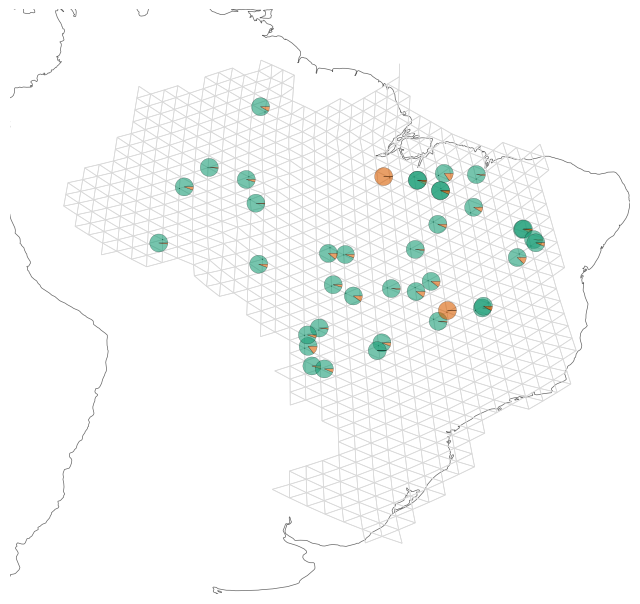

In [696]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1, projection=projection)  
v = Viz(ax, sp_graph_jt, projection=projection, edge_width=.5, edge_zorder=100, sample_pt_size=12, 
        obs_node_size=0.1, sample_pt_color="black", cbar_font_size=10)
v.draw_map(); v.draw_edges(use_weights=False); v.draw_obs_nodes(use_ids=False); 
radius = 0.15

for i in range(genotypes.shape[0]):
    draw_admix_pie(Q_k2[i, :], v.coord[i, 0], v.coord[i, 1], colors_k2, radius=3*radius,ax=ax)

for i in range(genotypes.shape[0]):
    draw_admix_pie(Q_k3[i, :], v.coord[i, 0], v.coord[i, 1], colors_k3, radius=3*radius,ax=ax)

for i in range(genotypes.shape[0]):
    draw_admix_pie(Q_k4[i, :], v.coord[i, 0], v.coord[i, 1], colors_k4, radius=3*radius,ax=ax)

# for i in range(genotypes.shape[0]):
#     draw_admix_pie(Q_k7[i, :], v.coord[i, 0], v.coord[i, 1], colors_k7, radius=3*radius,ax=ax)

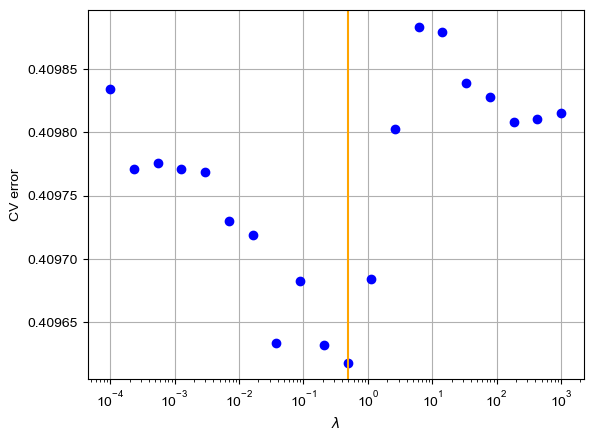

In [574]:
# lamb_grid = np.geomspace(1e-4, 1e3, 20)[::-1]
# cv_err = run_cv(sp_graph_jt, lamb_grid, n_folds=sp_graph_jt.n_observed_nodes, factr=1e10)
# mean_cv_err = np.mean(cv_err, axis=0)
# float(lamb_grid[np.argmin(mean_cv_err)])

# plt.plot(lamb_grid,mean_cv_err,'bo'); plt.axvline(float(lamb_grid[np.argmin(mean_cv_err)]),color='orange'); plt.semilogx(); plt.xlabel(r'$\lambda$'); plt.ylabel('CV error'); plt.grid()

6660488

In [1000]:
# (bim, fam, G) = read_plink("/Users/vivaswatshastry/Downloads/Vivaswat/LD_filtered.imputed")

# np.count_nonzero(np.array(G) == 0)   
# imp = SimpleImputer(missing_values=np.nan, strategy="mean")
# genotypes = imp.fit_transform((np.array(G)).T)

# # Filter genotypes matrix based on variable sites
variable_sites = np.var(genotypes, axis=0) > 0  
genotypes = genotypes[:, variable_sites]
genotypes = genotypes[:, np.random.randint(0,genotypes.shape[1],10000)]
print("n_samples={}, n_snps={}".format(genotypes.shape[0], genotypes.shape[1]))

outer = np.loadtxt("/Users/vivaswatshastry/Downloads/Vivaswat/outer_4000.csv")  # outer coordinates 
coord = np.loadtxt("/Users/vivaswatshastry/Downloads/Vivaswat/coord.csv")  # sample coordinates
edges = np.loadtxt("/Users/vivaswatshastry/Downloads/Vivaswat/edges_4000.csv", dtype=int)  # sample coordinates
grid = np.loadtxt("/Users/vivaswatshastry/Downloads/Vivaswat/grid_4000.csv")

# sp_graph = SpatialGraph(genotypes, coord, grid, edges, scale_snps=True)

FileNotFoundError: [Errno 2] No such file or directory